# load module (no used)

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
import dask.dataframe as dd

# 25 candidate maternal factors 
output: `candidate_maternal_tr_ls`

In [3]:
# select ww's 25 maternal factors and turn to transcript format
# output: candidate_maternal_tr_ls
candidate_maternal_gene_ls = ['tbpl2', 'orc1', 'ftr81', 'lmx1a', 'zgc:165514', 
                              'si:dkey-208k4.2', 'CU929037.1', 'zgc:113424', 'zgc:114123', 
                              'mcm3l', 'mcm6l', 'npm2a', 'zgc:152977', 'cita', 
                              'si:ch211-286b5.4', 'zgc:56231', 'si:ch211-119o8.6', 'zglp1', 'figla',
                              'e2f5', 'rnf17', 'pias4b', 'stk31', 'ccdc172', 'kank1b']
        
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.genePredExt'
tr_gene_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
tr_gene_pd = tr_gene_pd.iloc[:,[0,11]]
tr_gene_pd.columns = ['transcript_id', 'gene_id']
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11.ensGeneToGeneSymbol.txt'
gene_symbol_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
gene_symbol_pd.columns = ['gene_id', 'gene_symbol']
tr_gene_symbol_pd = pd.merge(tr_gene_pd, gene_symbol_pd, on="gene_id")

candidate_maternal_trid_geneid_sym = tr_gene_symbol_pd.loc[tr_gene_symbol_pd["gene_symbol"].isin(candidate_maternal_gene_ls)]
tr_gene_symbol_pd.head()

,transcript_id,gene_id,gene_symbol
0,ENSDART00000164359.1,ENSDARG00000099104.1,rpl24
1,ENSDART00000158290.1,ENSDARG00000099104.1,rpl24
2,ENSDART00000157701.1,ENSDARG00000099104.1,rpl24
3,ENSDART00000167898.1,ENSDARG00000099104.1,rpl24
4,ENSDART00000166393.1,ENSDARG00000102407.2,cep97


In [92]:
candidate_maternal_trid_geneid_sym['transcript_id_clean'] = list(zip(*candidate_maternal_trid_geneid_sym['transcript_id'].str.split('.')))[0]
candidate_maternal_trid_geneid_sym.head()

<ipython-input-92-7f067f70966f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_maternal_trid_geneid_sym['transcript_id_clean'] = list(zip(*candidate_maternal_trid_geneid_sym['transcript_id'].str.split('.')))[0]


,transcript_id,gene_id,gene_symbol,transcript_id_clean
2479,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687
2480,ENSDART00000152504.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152504
2481,ENSDART00000152121.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152121
2482,ENSDART00000152769.2,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152769
2483,ENSDART00000152282.2,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152282


In [4]:
tr_gene_pd_clean = pd.DataFrame(zip(list(zip(*tr_gene_symbol_pd['transcript_id'].str.split('.')))[0], list(zip(*tr_gene_symbol_pd['gene_id'].str.split('.')))[0]))
tr_gene_pd_clean.columns = ['transcript_id_clean', 'gene_id_clean']
tr_gene_pd_clean

,transcript_id_clean,gene_id_clean
0,ENSDART00000164359,ENSDARG00000099104
1,ENSDART00000158290,ENSDARG00000099104
2,ENSDART00000157701,ENSDARG00000099104
3,ENSDART00000167898,ENSDARG00000099104
4,ENSDART00000166393,ENSDARG00000102407
...,...,...
65835,ENSDART00000183313,ENSDARG00000114956
65836,ENSDART00000183313,ENSDARG00000114956
65837,ENSDART00000183313,ENSDARG00000114956
65838,ENSDART00000183313,ENSDARG00000114956


In [5]:
gene_symbol_clean = pd.read_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11.ensGeneToGeneSymbol.clean.txt', header=None, 
                                sep = '\t')
gene_symbol_clean.columns = ['gene_id_clean', 'gene_symbol']
gene_symbol_clean

,gene_id_clean,gene_symbol
0,ENSDARG00000099104,rpl24
1,ENSDARG00000102407,cep97
2,ENSDARG00000102097,nfkbiz
3,ENSDARG00000099319,CU651657.1
4,ENSDARG00000099640,eed
...,...,...
32515,ENSDARG00000109919,CABZ01025162.1
32516,ENSDARG00000116629,CT025651.2
32517,ENSDARG00000114977,CT025651.1
32518,ENSDARG00000102423,FO818711.1


# read in .csv

## raw

In [492]:
# read in .tsv

os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon')
expr_raw_dict = {}
for expression_type in ['TPM'] :
    for finame in [f'ovary_earlyEmbryo_sample_exon_{expression_type}.tsv',
                   f'lateEmbryo_tissue_sample_exon_{expression_type}.tsv'] :
        expr_pd = dd.read_csv(finame, header=0, sep="\t", encoding="utf-8")
        expr_pd.index = expr_pd['exon_id'].astype('category')
        k = f'{finame[:17]}_{expression_type}'
        expr_raw_dict[k] = expr_pd.drop('exon_id', axis = 1)
        expr_raw_dict[k].columns = [x.strip('X') for x in expr_raw_dict[k].columns]
        

/mnt/Storage/home/wangyiman/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [462]:
expr_raw_dict['ovary_earlyEmbryo_TPM'].head()

,5mpf_ovary_rep1,ovary_rep2,oocyte_rep1,oocyte_rep2,oocyte_stage1,oocyte_stage2,oocyte_stage3,oocyte_stage4,1cell_rep1,1cell_rep2,...,elife_30860_16hpf_somites_3,elife_30860_16hpf_somites_4,elife_30860_16hpf_somites_5,elife_30860_19hpf_somites_1,elife_30860_19hpf_somites_2,elife_30860_19hpf_somites_3,elife_30860_19hpf_somites_4,elife_30860_19hpf_somites_5,20ss_allskin_rep1,20ss_allskin_rep2
exon_id,,,,,,,,,,,,,,,,,,,,,
ENSDART00000000004.5.1,1.598116,0.443765,1.869867,1.825394,0.172480,0.313268,0.156636,0.235801,0.300328,0.220884,...,0.253192,0.000000,0.342244,0.524553,0.133667,0.129435,0.000000,0.003082,0.154407,0.048470
ENSDART00000000004.5.2,8.935889,2.805869,1.089710,2.277718,2.261301,4.601290,6.237452,0.000000,4.576962,6.318503,...,2.300462,1.618648,1.827976,0.272658,1.650726,1.652978,1.238611,1.324941,0.278723,0.339015
ENSDART00000000004.5.3,21.444956,7.343146,7.703125,6.468347,4.130007,8.499166,5.400085,1.601061,9.136024,8.890978,...,1.745558,1.552668,1.112506,0.378897,1.294312,1.179526,1.156829,1.268553,0.673836,1.009955
ENSDART00000000004.5.4,0.000000,1.075339,0.000000,0.000000,0.832566,0.420243,1.254364,0.000000,1.490353,1.770097,...,0.000000,0.514028,0.000000,0.000000,0.000000,0.046316,0.000000,0.674387,0.551872,0.000000
ENSDART00000000004.5.5,0.000000,2.441845,0.000000,0.447126,4.415289,4.383535,2.336897,0.388471,9.125546,9.414843,...,0.000000,0.000000,0.000000,1.087209,0.000000,0.465374,0.847983,0.477121,0.000000,0.126448


In [458]:
expr_raw_dict['lateEmbryo_tissue_TPM'].head()

,24hpf_pgc_rep1,24hpf_pgc_rep2,24hpf_pgc_rep3,24hpf_pgc_rep4,24hpf_rep1,24hpf_rep2,24hpf_rep3,24hpf_rep4,24hpf_rep5,24hpf_rep6,...,ventricle_rep1,ventricle_rep2,ventricle_rep3,ventricle_rep4,ventricle_rep5,testis_rep1,testis_rep2,testis_rep3,testis_rep4,testis_rep5
exon_id,,,,,,,,,,,,,,,,,,,,,
ENSDART00000000004.5.1,1.457431,0.780506,1.597509,0.896384,0.220342,1.285405,0.000000,0.613507,0.917635,0.483964,...,1.706490,0.100466,0.549512,1.702183,0.502903,0.951127,0.593875,0.781464,0.391247,0.136971
ENSDART00000000004.5.2,0.026499,0.000000,0.000000,0.000000,0.220342,0.395509,0.560882,0.613507,0.458817,0.604954,...,0.525074,0.334886,0.571492,0.325417,0.114296,0.951127,0.296938,1.041952,0.978119,0.639197
ENSDART00000000004.5.3,2.040403,0.936608,1.542423,0.158185,3.415308,3.262952,1.869608,2.576729,3.670540,2.056845,...,2.187807,1.607453,2.791519,3.379334,1.280116,4.121549,2.672439,4.949271,5.086217,4.839632
ENSDART00000000004.5.4,0.000000,0.000000,0.000000,0.000000,0.220342,0.197755,0.000000,0.122701,0.305878,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195624,0.000000
ENSDART00000000004.5.5,0.000000,0.000000,0.000000,0.052728,0.661027,0.791019,0.560882,0.245403,0.152939,0.483964,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.634084,0.296938,0.520976,0.978119,0.684854


In [355]:
expr_raw_dict[k].mean().compute()

24hpf_pgc_rep1    3.101593
24hpf_pgc_rep2    3.101593
24hpf_pgc_rep3    3.101593
24hpf_pgc_rep4    3.101593
24hpf_rep1        3.101593
                    ...   
testis_rep1       3.101593
testis_rep2       3.101593
testis_rep3       3.101593
testis_rep4       3.101593
testis_rep5       3.101593
Length: 208, dtype: float64

## batch effect removed

In [10]:
# read in .tsv

os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon')
expr_combat_dict = {}
for expression_type in ['TPM'] :
    for finame in [f'ovary_earlyEmbryo_exon_{expression_type}_matrix_exOvary_ComBatSeq.csv', 
                   f'lateEmbryo_tissue_exon_{expression_type}_matrix_exOvary_ComBatSeq.csv'] :
        expr_pd = dd.read_csv(finame, header=0, sep=",", encoding="utf-8")
        expr_pd['exon_id'] = expr_pd['Unnamed: 0'].str.split('|', expand = True, n = 1)[0]
#         expr_3id = dd.merge(expr_pd.drop('Unnamed: 0', axis = 1), exon_tr_gene_pd_clean, on="exon_id")
        expr_3id = expr_pd.drop('Unnamed: 0', axis = 1)
        expr_3id.index = expr_3id['exon_id'].astype('category')
#         expr_3id['transcript_id_clean'] = expr_3id['transcript_id_clean'].astype('category')
#         expr_3id['gene_id_clean'] = expr_3id['gene_id_clean'].astype('category')
        k = f'{finame[:17]}_{expression_type}'
        expr_combat_dict[k] = expr_3id.drop('exon_id', axis = 1)
        expr_combat_dict[k].columns = [x.strip('X') for x in expr_combat_dict[k].columns]
        

In [11]:
expr_combat_dict.keys()

dict_keys(['ovary_earlyEmbryo_TPM', 'lateEmbryo_tissue_TPM'])

In [14]:
ovary_earlyEmbryo_TPM_stages = ['ovary'] * 2 + ['oocyte'] * 6 + ['1_cell'] * 12 + ['2_cell'] * 5 + ['4_cell'] * 2 + ['24_cell'] * 2 + ['64_cell'] * 2 + ['128_cell'] * 5 + ['256_cell'] * 3 + ['1k_cell'] * 9 + ['high'] * 5 + ['oblong'] * 1 + ['4hpf'] * 4 + ['sphere'] * 2 + ['dome'] * 9 + ['50epi'] * 5 + ['6hpf'] * 5 + ['shield'] * 5 + ['7hpf'] * 8 + ['8hpf'] * 5 + ['bud'] * 2 + ['10.33hpf'] * 5 + ['16hpf'] * 5 + ['19hpf'] * 5 + ['20ss'] * 2
ovary_earlyEmbryo_TPM_stages_uniq = ['ovary'] + ['oocyte'] + ['1_cell'] + ['2_cell'] + ['4_cell'] + ['24_cell'] + ['64_cell'] + ['128_cell'] + ['256_cell'] + ['1k_cell'] + ['high'] + ['oblong'] + ['4hpf'] + ['sphere'] + ['dome'] + ['50epi'] + ['6hpf'] + ['shield'] + ['7hpf'] + ['8hpf'] + ['bud'] + ['10.33hpf'] + ['16hpf'] + ['19hpf'] + ['20ss']

lateEmbryo_tissue_TPM_stages = ['24hpf'] * 19 + ['28hpf'] * 5 + ['30hpf'] * 5 + ['36hpf'] * 24 + ['48hpf'] * 7 + ['52hpf'] * 8 + ['56hpf'] * 2 + ['3dpf'] * 23 + ['4dpf'] * 28 + ['5dpf'] * 18 + ['6dpf'] * 7 + ['3wpf'] * 3 + ['2mpf'] * 2 + ['3mpf'] * 5 + ['epidermis_cLCs'] * 4 + ['epidermis_Keratinocytes'] * 3 + ['epidermis_MLCs'] * 4 + ['epidermis_Neutrophils'] * 3 + ['epidermis_T_cell'] * 3 + ['kidney'] * 7 + ['liver'] * 9 + ['muscle'] * 3 + ['retina_muller'] * 3 + ['valve'] * 3 + ['ventricle'] * 5 + ['testis'] * 5
lateEmbryo_tissue_TPM_stages_uniq = ['24hpf'] + ['28hpf'] + ['30hpf'] + ['36hpf'] + ['48hpf'] + ['52hpf'] + ['56hpf'] + ['3dpf'] + ['4dpf'] + ['5dpf'] + ['6dpf'] + ['3wpf'] + ['2mpf'] + ['3mpf'] + ['epidermis_cLCs'] + ['epidermis_Keratinocytes'] + ['epidermis_MLCs'] + ['epidermis_Neutrophils'] + ['epidermis_T_cell'] + ['kidney'] + ['liver'] + ['muscle'] + ['retina_muller'] + ['valve'] + ['ventricle'] + ['testis']
    
# lateEmbryo_tissue_TPM_samples = ['_'.join(x.split('_')[:-1]) for x in expr_combat_dict['lateEmbryo_tissue_TPM'].columns[:-2].tolist()]
lateEmbryo_tissue_TPM_samples = ['_'.join(x.split('_')[:-1]) for x in expr_combat_dict['lateEmbryo_tissue_TPM'].columns.tolist()]
lateEmbryo_tissue_TPM_samples = lateEmbryo_tissue_TPM_samples[:38] + ['36hpf_sample1'] * 3 + ['36hpf_sample2'] * 3 + lateEmbryo_tissue_TPM_samples[44:121] + ['5dpf_sample1'] * 2 + lateEmbryo_tissue_TPM_samples[123:125] + ['5dpf_sample2'] * 3 + lateEmbryo_tissue_TPM_samples[128:]
lateEmbryo_tissue_TPM_samples_uniq = pd.Series(lateEmbryo_tissue_TPM_samples).drop_duplicates().tolist()
len(lateEmbryo_tissue_TPM_samples_uniq)

71

In [490]:
print(lateEmbryo_tissue_TPM_samples_uniq)

['24hpf_pgc', '24hpf', '24hpf_somatic', 'elife_30860_24hpf', '28hpf', 'elife_30860_30hpf', '36hpf_endothelial', '36hpf_HSPC', '36hpf_neural_crest', '36hpf_NHC', '36hpf_sample1', '36hpf_sample2', 'elife_30860_36hpf', '36hpf_pgc', '36hpf_somatic', '2dpf', 'elife_30860_2dpf', '52hpf_allskin', '52hpf_basal', '52hpf_CHT_NHC', '52hpf_periderm', '56hpf_heart', '3dpf_CHT_endothelial', '3dpf_CHT_HSPC', '3dpf_CHT_NHC', '3dpf_kidney', '72hpf_allskin', '72hpf_basal', '72hpf_neural_crest', '72hpf_periderm', 'elife_30860_3dpf', '4dpf_CHT_endothelial', '4dpf_CHT_HSPC', '4dpf_CHT_NHC', '4dpf_endothelial', '4dpf_podocytes', '4dpf_vascular_muscle_acta2_n_fosc1b_n', '4dpf_vascular_muscle_acta2_n', '4dpf_vascular_muscle_acta2_p_fosc1b_p', '4dpf_vascular_muscle_acta2_p', 'elife_30860_4dpf', '5dpf_sample1', '5dpf_beta', '5dpf_sample2', '5dpf_vascular_muscle_kdrl_n', '5dpf_vascular_muscle_kdrl_p', 'elife_30860_5dpf', '6dpf_IEC', '6dpf_LRE', '6dpf', '3wpf', '2mpf_liver', '3mpf_heart', '3mpf_kidney_HSPC', '3mp

In [489]:
print(lateEmbryo_tissue_TPM_samples)

['24hpf_pgc', '24hpf_pgc', '24hpf_pgc', '24hpf_pgc', '24hpf', '24hpf', '24hpf', '24hpf', '24hpf', '24hpf', '24hpf_somatic', '24hpf_somatic', '24hpf_somatic', '24hpf_somatic', 'elife_30860_24hpf', 'elife_30860_24hpf', 'elife_30860_24hpf', 'elife_30860_24hpf', 'elife_30860_24hpf', '28hpf', '28hpf', '28hpf', '28hpf', '28hpf', 'elife_30860_30hpf', 'elife_30860_30hpf', 'elife_30860_30hpf', 'elife_30860_30hpf', 'elife_30860_30hpf', '36hpf_endothelial', '36hpf_endothelial', '36hpf_HSPC', '36hpf_HSPC', '36hpf_neural_crest', '36hpf_neural_crest', '36hpf_neural_crest', '36hpf_NHC', '36hpf_NHC', '36hpf_sample1', '36hpf_sample1', '36hpf_sample1', '36hpf_sample2', '36hpf_sample2', '36hpf_sample2', 'elife_30860_36hpf', 'elife_30860_36hpf', 'elife_30860_36hpf', 'elife_30860_36hpf', 'elife_30860_36hpf', '36hpf_pgc', '36hpf_pgc', '36hpf_somatic', '36hpf_somatic', '2dpf', '2dpf', 'elife_30860_2dpf', 'elife_30860_2dpf', 'elife_30860_2dpf', 'elife_30860_2dpf', 'elife_30860_2dpf', '52hpf_allskin', '52hpf_a

In [15]:
len(lateEmbryo_tissue_TPM_samples)

208

# rm low corr reps

## tissue

In [16]:
df_tmp = expr_combat_dict['lateEmbryo_tissue_TPM'].compute()

In [19]:
rep_low_corr_ls = []

for sample in lateEmbryo_tissue_TPM_samples_uniq :    
#     heatmap_tpm = df_tmp.iloc[:,:-2].loc[:, [x == sample for x in lateEmbryo_tissue_TPM_samples]]
    heatmap_tpm = df_tmp.loc[:, [x == sample for x in lateEmbryo_tissue_TPM_samples]]
    corr = heatmap_tpm.astype(float).corr()
    rep_low_corr_tmp = corr.loc[(corr.sum(axis = 0).astype(float) - 1) <= (corr.shape[1] - 1) * 0.8].index.tolist()
    rep_low_corr_ls += rep_low_corr_tmp
    
if rep_low_corr_ls :
    print(rep_low_corr_ls)
    

['4dpf_vascular_muscle_acta2_p_fosc1b_p_rep1', '4dpf_vascular_muscle_acta2_p_fosc1b_p_rep2', '6dpf_IEC_rep1', '6dpf_rep1', '3mpf_heart_rep1', 'epidermis_Keratinocytes_rep1', 'epidermis_Keratinocytes_rep2', 'epidermis_Neutrophils_rep1', 'epidermis_Neutrophils_rep2', 'epidermis_Neutrophils_rep3', 'kidney_HSC_gata2a_n_runx1_p']


In [39]:
rep_high_corr_ls_tissue = lateEmbryo_tissue_TPM_samples.copy()
for x in rep_low_corr_ls_tissue :
    rep_high_corr_ls_tissue.remove('_'.join(x.split('_')[:-1]))
    
print(len(rep_high_corr_ls_tissue))
                                  

197


In [48]:
rep_high_corr_ls_tissue_uniq = lateEmbryo_tissue_TPM_samples_uniq.copy()
for x in set(['_'.join(x.split('_')[:-1]) for x in rep_low_corr_ls_tissue]) :
    rep_high_corr_ls_tissue_uniq.remove(x)
    
print(len(rep_high_corr_ls_tissue_uniq))

64


In [20]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr'] = expr_combat_dict['lateEmbryo_tissue_TPM'].drop(rep_low_corr_ls, axis = 1)
# expr_combat_dict['lateEmbryo_tissue_TPM_highCorr'].head()

In [21]:
expr_combat_dict['lateEmbryo_tissue_TPM'].shape

(Delayed('int-950e5c00-47df-47c1-9409-b7d979cb87fc'), 208)

In [22]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr'].shape

(Delayed('int-a7a229e6-72f6-4e4c-92e8-277d8f377b95'), 197)

## embryo

If the mean rep corr thres is set to > 0.8, there is no need to run for early embryo. 

In [24]:
expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'] = expr_combat_dict['ovary_earlyEmbryo_TPM']

In [385]:
# df_tmp2 = expr_combat_dict['ovary_earlyEmbryo_TPM'].compute()

In [386]:
# df_tmp2.head()

,oocyte_rep1,oocyte_rep2,1cell_rep1,1cell_rep2,1cell_rep3,1cell_rep4,1cell_rep5,1cell_rep6,1cell_rep7,elife_30860_1cell_1,...,elife_30860_16hpf_somites_5,elife_30860_19hpf_somites_1,elife_30860_19hpf_somites_2,elife_30860_19hpf_somites_3,elife_30860_19hpf_somites_4,elife_30860_19hpf_somites_5,20ss_allskin_rep1,20ss_allskin_rep2,transcript_id_clean,gene_id_clean
exon_id,,,,,,,,,,,,,,,,,,,,,
ENSDART00000000004.5.1,0.577795,1.385141,1.480533,1.266204,1.068887,0.934058,0.865138,2.285655,2.406098,0.716801,...,1.965900,2.404625,0.979428,0.893694,0.000000,0.153903,1.092357,0.257754,ENSDART00000000004,ENSDARG00000000001
ENSDART00000000004.5.2,0.311120,0.846475,2.391630,3.271026,5.077211,4.255151,5.731538,0.425898,0.534688,0.430080,...,0.655300,0.171759,0.652952,0.595796,0.569407,0.461710,0.136545,0.257754,ENSDART00000000004,ENSDARG00000000001
ENSDART00000000004.5.3,7.289109,7.695227,10.135955,9.918596,9.619979,7.472461,8.218810,7.126701,6.772720,6.307846,...,8.027423,2.404625,7.835427,7.447448,7.592092,7.849063,3.550159,5.928337,ENSDART00000000004,ENSDARG00000000001
ENSDART00000000004.5.4,0.000000,0.000000,0.569436,0.633102,0.534443,0.000000,0.540711,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.148949,0.000000,0.153903,0.273089,0.000000,ENSDART00000000004,ENSDARG00000000001
ENSDART00000000004.5.5,0.000000,0.230857,6.149905,6.331019,4.275546,2.387036,3.460551,0.255539,0.044557,0.000000,...,0.000000,0.515277,0.000000,0.297898,0.569407,0.307806,0.000000,0.128877,ENSDART00000000004,ENSDARG00000000001


In [387]:
# rep_low_corr_ls = []

# for stage in ovary_earlyEmbryo_TPM_stages_uniq :        
#     heatmap_tpm = df_tmp2.iloc[:,:-2].loc[:, [x == stage for x in ovary_earlyEmbryo_TPM_stages[6:]]]
#     corr = heatmap_tpm.astype(float).corr()
#     rep_low_corr_ls += corr.loc[(corr.sum(axis=1) - 1) / (corr.shape[0] - 1) <= 0.8].index.tolist()
    
# if rep_low_corr_ls :
#     print(rep_low_corr_ls)


In [388]:
# expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'] = expr_combat_dict['ovary_earlyEmbryo_TPM'].drop(rep_low_corr_ls, axis = 1)
# expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'].shape

(Delayed('int-2d2fd09d-a1bc-4409-9088-e194bdf5b2c3'), 112)

In [389]:
# expr_combat_dict['ovary_earlyEmbryo_TPM'].shape

(Delayed('int-6ab7a5bf-dd09-4f79-a34d-ad142e6fbfed'), 112)

# calculate mean expr

## embryo

In [26]:
i = 0
for stage in ovary_earlyEmbryo_TPM_stages_uniq[1:] :
#     cols = expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'].columns[:-2][[x == stage for x in ovary_earlyEmbryo_TPM_stages[6:]]]
    cols = expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'].columns[[x == stage for x in ovary_earlyEmbryo_TPM_stages[6:]]]
    dd_mean = expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'][cols].mean(axis = 1)
#     dd_mean.columns = [stage]
    if i == 0 :
        expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean'] = dd_mean
    else :
        expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean'] = dd.concat([expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean'], 
                                                                           dd_mean], axis = 1)
    i += 1

/mnt/Storage/home/wangyiman/anaconda3/lib/python3.8/site-packages/dask/dataframe/multi.py:1093: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indexes of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(


In [33]:
expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean'].columns = ovary_earlyEmbryo_TPM_stages_uniq[1:]

## tissue

In [51]:
i = 0
for stage in rep_high_corr_ls_tissue_uniq :
#     cols = expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'].columns[:-2][[x == stage for x in ovary_earlyEmbryo_TPM_stages[6:]]]
    cols = expr_combat_dict['lateEmbryo_tissue_TPM_highCorr'].columns[[x == stage for x in rep_high_corr_ls_tissue]]
    dd_mean = expr_combat_dict['lateEmbryo_tissue_TPM_highCorr'][cols].mean(axis = 1)
#     dd_mean.columns = [stage]
    if i == 0 :
        expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'] = dd_mean
    else :
        expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'] = dd.concat([expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'], 
                                                                           dd_mean], axis = 1)
    i += 1

In [52]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'].columns = rep_high_corr_ls_tissue_uniq

In [53]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'].head()

,24hpf_pgc,24hpf,24hpf_somatic,elife_30860_24hpf,28hpf,elife_30860_30hpf,36hpf_endothelial,36hpf_HSPC,36hpf_neural_crest,36hpf_NHC,...,kidney_HSC_gata2a_p_runx1,kidney,liver_female,liver_male,liver,muscle,retina_muller,valve,ventricle,testis
exon_id,,,,,,,,,,,,,,,,,,,,,
ENSDART00000000004.5.1,1.182958,0.586809,1.130975,1.120714,0.671991,1.071399,1.905547,2.408062,0.000000,0.000000,...,1.119265,0.351234,0.265935,0.371018,0.489278,0.835516,0.562098,3.066535,0.912311,0.570937
ENSDART00000000004.5.2,0.006625,0.475669,0.120300,0.572350,0.500423,0.474714,0.749120,0.157382,0.120559,0.159600,...,0.374828,0.563408,0.076095,0.496439,0.257999,0.138240,0.000000,2.083555,0.374233,0.781466
ENSDART00000000004.5.3,1.169405,2.808664,1.031448,3.236860,2.772274,3.319279,8.235677,3.023666,0.723353,6.695604,...,2.351295,6.169425,0.956028,1.452900,2.356385,2.256389,1.020803,5.527524,2.249246,4.333822
ENSDART00000000004.5.4,0.000000,0.141113,0.000000,0.000000,0.008888,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.020300,0.000000,0.000000,0.000000,0.000000,0.039125
ENSDART00000000004.5.5,0.013182,0.482539,0.000000,0.203386,0.099775,0.116957,0.126830,0.000000,0.000000,0.080300,...,0.000000,0.000000,0.140580,0.351176,0.157015,0.029818,0.000000,0.730134,0.000000,0.622994


In [54]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr'].head()

,24hpf_pgc_rep1,24hpf_pgc_rep2,24hpf_pgc_rep3,24hpf_pgc_rep4,24hpf_rep1,24hpf_rep2,24hpf_rep3,24hpf_rep4,24hpf_rep5,24hpf_rep6,...,ventricle_rep1,ventricle_rep2,ventricle_rep3,ventricle_rep4,ventricle_rep5,testis_rep1,testis_rep2,testis_rep3,testis_rep4,testis_rep5
exon_id,,,,,,,,,,,,,,,,,,,,,
ENSDART00000000004.5.1,1.457431,0.780506,1.597509,0.896384,0.220342,1.285405,0.000000,0.613507,0.917635,0.483964,...,1.706490,0.100466,0.549512,1.702183,0.502903,0.951127,0.593875,0.781464,0.391247,0.136971
ENSDART00000000004.5.2,0.026499,0.000000,0.000000,0.000000,0.220342,0.395509,0.560882,0.613507,0.458817,0.604954,...,0.525074,0.334886,0.571492,0.325417,0.114296,0.951127,0.296938,1.041952,0.978119,0.639197
ENSDART00000000004.5.3,2.040403,0.936608,1.542423,0.158185,3.415308,3.262952,1.869608,2.576729,3.670540,2.056845,...,2.187807,1.607453,2.791519,3.379334,1.280116,4.121549,2.672439,4.949271,5.086217,4.839632
ENSDART00000000004.5.4,0.000000,0.000000,0.000000,0.000000,0.220342,0.197755,0.000000,0.122701,0.305878,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195624,0.000000
ENSDART00000000004.5.5,0.000000,0.000000,0.000000,0.052728,0.661027,0.791019,0.560882,0.245403,0.152939,0.483964,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.634084,0.296938,0.520976,0.978119,0.684854


In [61]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exTestis'] = expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'].drop('testis', axis = 1)
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_Testis'] = expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'].testis.to_frame()
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_Testis'].head()

,testis
exon_id,
ENSDART00000000004.5.1,0.570937
ENSDART00000000004.5.2,0.781466
ENSDART00000000004.5.3,4.333822
ENSDART00000000004.5.4,0.039125
ENSDART00000000004.5.5,0.622994


# filter exons

## filter exons less than 50bp

In [62]:
%%bash
cd ~/source/bySpecies/danRer11_2/ensGene/
awk 'BEGIN{FS=OFS="\t"} $7>=50{print}' danRer11_2.ensGene.exon_len.bed > ~/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/danRer11_2.ensGene.exon_lenOver50.bed
wc -l ~/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/danRer11_2.ensGene.exon_lenOver50.bed

298888 /mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/danRer11_2.ensGene.exon_lenOver50.bed


In [66]:
exon_len_Over50 = dd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/danRer11_2.ensGene.exon_lenOver50.bed',
                              sep = '\t', usecols = [3], header = None).iloc[:,0]


In [118]:
for k in ['ovary_earlyEmbryo_TPM_highCorr_mean', 'lateEmbryo_tissue_TPM_highCorr_mean'] :
    expr_combat_dict[f'{k}_exonOver50'] = expr_combat_dict[k].compute().loc[exon_len_Over50.compute().tolist()]
    
expr_combat_dict[f'{k}_exonOver50']

,24hpf_pgc,24hpf,24hpf_somatic,elife_30860_24hpf,28hpf,elife_30860_30hpf,36hpf_endothelial,36hpf_HSPC,36hpf_neural_crest,36hpf_NHC,...,kidney_HSC_gata2a_p_runx1,kidney,liver_female,liver_male,liver,muscle,retina_muller,valve,ventricle,testis
exon_id,,,,,,,,,,,,,,,,,,,,,
ENSDART00000164359.1.1,0.431110,1.418485,1.332613,0.639711,2.209397,0.630562,1.099702,0.725649,0.000000,0.461100,...,3.094862,1.074539,0.102333,0.112161,0.606696,0.606773,0.257268,0.030844,0.516319,0.640126
ENSDART00000164359.1.2_ENSDART00000157701.1.2_ENSDART00000167898.1.2,0.143961,80.151045,0.177943,0.151489,38.551813,0.180049,0.192564,0.139895,0.000000,0.020200,...,0.000000,0.077620,0.037848,0.000000,0.334472,0.112025,0.140467,2.762346,0.000000,88.701277
ENSDART00000164359.1.3_ENSDART00000167898.1.3,27.499240,195.426671,33.774595,221.467501,386.236922,198.386840,1.906291,7.817403,0.143967,2.100555,...,0.000000,1.581961,170.343129,193.942735,71.266453,1.112891,1.109611,0.061804,6.048652,143.287530
ENSDART00000164359.1.4_ENSDART00000167898.1.4,27.066563,147.681935,24.834500,107.138752,305.486933,104.738256,1.954513,3.231392,0.104703,1.964849,...,23.473249,1.926372,192.121606,179.823344,24.493586,0.372548,0.421748,70.353670,3.387109,93.475058
ENSDART00000164359.1.5,0.830756,50.402999,0.522261,0.547490,33.912950,0.896744,1.050468,3.389776,0.026176,3.275101,...,3.793354,1.674848,0.684855,0.853795,0.392363,0.364113,0.000000,132.214227,1.053712,3.484686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSDART00000181414.1_50.1_ENSDART00000186439.1_26.1_ENSDART00000185948.1_51.1_ENSDART00000180246.1_28.1_ENSDART00000189472.1_51.1_ENSDART00000182794.1_27.1_ENSDART00000186569.1_28.1_ENSDART00000127341.3_50.1_ENSDART00000181292.1_28.1_ENSDART00000185304.1_28.1_ENSDART00000193266.1_27.1_ENSDART00000179752.1_51.1_ENSDART00000188851.1_28.1_ENSDART00000189118.1_50.1,0.020396,0.051610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.124073,0.000000,0.000000,0.000000,0.020786,0.000000,0.281049,0.000000,0.000000,0.000000
ENSDART00000181414.1_51.1_ENSDART00000186439.1_27.1_ENSDART00000185948.1_53.1_ENSDART00000180246.1_26.1_ENSDART00000189472.1_50.1_ENSDART00000182794.1_26.1_ENSDART00000186569.1_27.1_ENSDART00000127341.3_52.1_ENSDART00000181292.1_26.1_ENSDART00000185304.1_26.1_ENSDART00000193266.1_26.1_ENSDART00000179752.1_53.1_ENSDART00000188851.1_26.1_ENSDART00000189118.1_51.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSDART00000181414.1_52.1_ENSDART00000185948.1_50.1_ENSDART00000189472.1_52.1_ENSDART00000192349.1_24.1_ENSDART00000127341.3_54.1_ENSDART00000182981.1_25.1_ENSDART00000179752.1_50.1_ENSDART00000189118.1_52.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [120]:
for k in ['lateEmbryo_tissue_TPM_highCorr_mean_exTestis', 'lateEmbryo_tissue_TPM_highCorr_mean_Testis'] :
    expr_combat_dict[f'{k}_exonOver50'] = expr_combat_dict[k].compute().loc[exon_len_Over50.compute().tolist()]
    
expr_combat_dict[f'{k}_exonOver50']

,testis
exon_id,
ENSDART00000164359.1.1,0.640126
ENSDART00000164359.1.2_ENSDART00000157701.1.2_ENSDART00000167898.1.2,88.701277
ENSDART00000164359.1.3_ENSDART00000167898.1.3,143.287530
ENSDART00000164359.1.4_ENSDART00000167898.1.4,93.475058
ENSDART00000164359.1.5,3.484686
...,...
ENSDART00000181414.1_50.1_ENSDART00000186439.1_26.1_ENSDART00000185948.1_51.1_ENSDART00000180246.1_28.1_ENSDART00000189472.1_51.1_ENSDART00000182794.1_27.1_ENSDART00000186569.1_28.1_ENSDART00000127341.3_50.1_ENSDART00000181292.1_28.1_ENSDART00000185304.1_28.1_ENSDART00000193266.1_27.1_ENSDART00000179752.1_51.1_ENSDART00000188851.1_28.1_ENSDART00000189118.1_50.1,0.000000
ENSDART00000181414.1_51.1_ENSDART00000186439.1_27.1_ENSDART00000185948.1_53.1_ENSDART00000180246.1_26.1_ENSDART00000189472.1_50.1_ENSDART00000182794.1_26.1_ENSDART00000186569.1_27.1_ENSDART00000127341.3_52.1_ENSDART00000181292.1_26.1_ENSDART00000185304.1_26.1_ENSDART00000193266.1_26.1_ENSDART00000179752.1_53.1_ENSDART00000188851.1_26.1_ENSDART00000189118.1_51.1,0.000000
ENSDART00000181414.1_52.1_ENSDART00000185948.1_50.1_ENSDART00000189472.1_52.1_ENSDART00000192349.1_24.1_ENSDART00000127341.3_54.1_ENSDART00000182981.1_25.1_ENSDART00000179752.1_50.1_ENSDART00000189118.1_52.1,0.000000


## asign exon

In [80]:
# exon_id_ls = dd.DataFrame(zip(*pd.DataFrame(zip(*dd.read_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.ExonUniq.gtf', 
#                                      sep = '\t', header = 0).iloc[:,8].drop_duplicates().str.split(';'))).T.iloc[:,0].drop_duplicates().str.split('"'))).T.iloc[:,1].tolist()

exon_id_ls = exon_len_Over50.compute()

There is some transcript id like "ENSDART00000139453.3_16.1" in Chr4.

In [97]:
exon_gene_id_dict = {}
exon_gene_id_dict_nonUniq = {}
for exon_id in set(exon_id_ls) :
    trans_ids = [('ENSDART'+x).strip('_') for x in exon_id.split('ENSDART') if x]    
    gene_ids = []
    for trans_id in trans_ids :
        gene_id_series = tr_gene_pd_clean.loc[tr_gene_pd_clean['transcript_id_clean'] == trans_id.split('.')[0]]['gene_id_clean'].tolist()
        if gene_id_series : 
            gene_ids.append(gene_id_series[0])
        else :
            print(exon_id)
        
    if len(set(gene_ids)) == 1 :
        exon_gene_id_dict[exon_id] = gene_ids[0]
    else :
#         print(gene_ids, exon_id)
        exon_gene_id_dict_nonUniq[exon_id] = gene_ids
        

In [98]:
len(exon_gene_id_dict)

297090

In [99]:
len(exon_gene_id_dict_nonUniq)

1798

In [100]:
len(set(exon_id_ls))

298888

In [101]:
exon_tr_gene_pd_clean = pd.merge(tr_gene_pd_clean, pd.DataFrame.from_dict(exon_gene_id_dict, orient='index').reset_index(), 
                                  left_on = 'gene_id_clean', right_on = 0).iloc[:,:-1]
exon_tr_gene_pd_clean.columns = ['transcript_id_clean', 'gene_id_clean', 'exon_id']
exon_tr_gene_pd_clean

,transcript_id_clean,gene_id_clean,exon_id
0,ENSDART00000164359,ENSDARG00000099104,ENSDART00000167898.1.5
1,ENSDART00000164359,ENSDARG00000099104,ENSDART00000164359.1.6
2,ENSDART00000164359,ENSDARG00000099104,ENSDART00000164359.1.4_ENSDART00000167898.1.4
3,ENSDART00000164359,ENSDARG00000099104,ENSDART00000164359.1.2_ENSDART00000157701.1.2_...
4,ENSDART00000164359,ENSDARG00000099104,ENSDART00000164359.1.5
...,...,...,...
1018618,ENSDART00000168273,ENSDARG00000104674,ENSDART00000168273.2.2
1018619,ENSDART00000168273,ENSDARG00000104674,ENSDART00000168273.2.3
1018620,ENSDART00000168273,ENSDARG00000104674,ENSDART00000168273.2.8
1018621,ENSDART00000168273,ENSDARG00000104674,ENSDART00000168273.2.1


### candidate gene exons

In [93]:
candidate_maternal_trid_geneid_sym.head()

,transcript_id,gene_id,gene_symbol,transcript_id_clean
2479,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687
2480,ENSDART00000152504.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152504
2481,ENSDART00000152121.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152121
2482,ENSDART00000152769.2,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152769
2483,ENSDART00000152282.2,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152282


In [102]:
candidate_maternal_geneid_sym_exon = pd.merge(candidate_maternal_trid_geneid_sym, exon_tr_gene_pd_clean, on = 'transcript_id_clean')
candidate_maternal_trid_geneid_sym_exon

,transcript_id,gene_id,gene_symbol,transcript_id_clean,gene_id_clean,exon_id
0,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687,ENSDARG00000089765,ENSDART00000152504.3.8
1,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687,ENSDARG00000089765,ENSDART00000152687.3.6_ENSDART00000152504.3.3_...
2,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687,ENSDARG00000089765,ENSDART00000152687.3.13
3,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687,ENSDARG00000089765,ENSDART00000152121.3.1
4,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687,ENSDARG00000089765,ENSDART00000152687.3.1
...,...,...,...,...,...,...
883,ENSDART00000132295.4,ENSDARG00000056387.8,rnf17,ENSDART00000132295,ENSDARG00000056387,ENSDART00000176057.2.21_ENSDART00000132295.4.21
884,ENSDART00000132295.4,ENSDARG00000056387.8,rnf17,ENSDART00000132295,ENSDARG00000056387,ENSDART00000176057.2.25_ENSDART00000132295.4.25
885,ENSDART00000132295.4,ENSDARG00000056387.8,rnf17,ENSDART00000132295,ENSDARG00000056387,ENSDART00000176057.2.30_ENSDART00000132295.4.30
886,ENSDART00000132295.4,ENSDARG00000056387.8,rnf17,ENSDART00000132295,ENSDARG00000056387,ENSDART00000176057.2.3_ENSDART00000132295.4.3


In [121]:
for k in ['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50', 
          'lateEmbryo_tissue_TPM_highCorr_mean_exonOver50',
          'lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50',
          'lateEmbryo_tissue_TPM_highCorr_mean_Testis_exonOver50'
         ] :
    tmp_df = expr_combat_dict[k].copy()
#     tmp_df['exon_id'] = tmp_df.index
    tmp_df = tmp_df.reset_index()
    expr_combat_dict[f'{k}_candidate'] = pd.merge(tmp_df, candidate_maternal_trid_geneid_sym_exon, on = 'exon_id')
    
expr_combat_dict[f'{k}_candidate']

,exon_id,testis,transcript_id,gene_id,gene_symbol,transcript_id_clean,gene_id_clean
0,ENSDART00000152687.3.1,0.139059,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687,ENSDARG00000089765
1,ENSDART00000152687.3.1,0.139059,ENSDART00000152504.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152504,ENSDARG00000089765
2,ENSDART00000152687.3.1,0.139059,ENSDART00000152121.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152121,ENSDARG00000089765
3,ENSDART00000152687.3.1,0.139059,ENSDART00000152769.2,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152769,ENSDARG00000089765
4,ENSDART00000152687.3.1,0.139059,ENSDART00000152282.2,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152282,ENSDARG00000089765
...,...,...,...,...,...,...,...
883,ENSDART00000176057.2.36_ENSDART00000132295.4.36,0.000000,ENSDART00000132295.4,ENSDARG00000056387.8,rnf17,ENSDART00000132295,ENSDARG00000056387
884,ENSDART00000132295.4.1,0.133769,ENSDART00000176057.2,ENSDARG00000056387.8,rnf17,ENSDART00000176057,ENSDARG00000056387
885,ENSDART00000132295.4.1,0.133769,ENSDART00000132295.4,ENSDARG00000056387.8,rnf17,ENSDART00000132295,ENSDARG00000056387
886,ENSDART00000132295.4.37,0.000000,ENSDART00000176057.2,ENSDARG00000056387.8,rnf17,ENSDART00000176057,ENSDARG00000056387


## candidate gene distribution

In [128]:
list(expr_combat_dict.keys())

['ovary_earlyEmbryo_TPM',
 'lateEmbryo_tissue_TPM',
 'lateEmbryo_tissue_TPM_highCorr',
 'ovary_earlyEmbryo_TPM_highCorr',
 'ovary_earlyEmbryo_TPM_highCorr_mean',
 'lateEmbryo_tissue_TPM_highCorr_mean',
 'lateEmbryo_tissue_TPM_highCorr_mean_exTestis',
 'lateEmbryo_tissue_TPM_highCorr_mean_Testis',
 'ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50',
 'lateEmbryo_tissue_TPM_highCorr_mean_exonOver50',
 'ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50_candidate',
 'lateEmbryo_tissue_TPM_highCorr_mean_exonOver50_candidate',
 'lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50',
 'lateEmbryo_tissue_TPM_highCorr_mean_Testis_exonOver50',
 'lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50_candidate',
 'lateEmbryo_tissue_TPM_highCorr_mean_Testis_exonOver50_candidate']

In [147]:
pd.merge(pd.DataFrame(expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50_candidate'].max(axis = 1, numeric_only=True).tolist(), 
                      expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50_candidate']['gene_id_clean']).reset_index().groupby('gene_id_clean').max().reset_index(),
         candidate_maternal_trid_geneid_sym_exon[['gene_id_clean', 'gene_symbol']].drop_duplicates(), on = 'gene_id_clean'
        ).sort_values(0)

,gene_id_clean,0,gene_symbol
8,ENSDARG00000039937,2.672437,ccdc172
21,ENSDARG00000089856,4.137925,cita
20,ENSDARG00000089765,10.347966,si:ch211-286b5.4
12,ENSDARG00000056387,12.606589,rnf17
11,ENSDARG00000056339,12.879320,stk31
19,ENSDARG00000089607,13.214171,CU929037.1
16,ENSDARG00000076391,14.089410,npm2a
6,ENSDARG00000038812,14.121151,e2f5
22,ENSDARG00000097302,14.671713,tbpl2
1,ENSDARG00000020354,15.376419,lmx1a


In [150]:
pd.merge(pd.DataFrame(expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50_candidate'].max(axis = 1, numeric_only=True).tolist(), 
                      expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50_candidate']['gene_id_clean']).reset_index().groupby('gene_id_clean').min().reset_index(),
         candidate_maternal_trid_geneid_sym_exon[['gene_id_clean', 'gene_symbol']].drop_duplicates(), on = 'gene_id_clean'
        ).sort_values(0)

,gene_id_clean,0,gene_symbol
23,ENSDARG00000104170,0.009150,si:dkey-208k4.2
10,ENSDARG00000044956,0.016763,zgc:114123
20,ENSDARG00000089765,0.020786,si:ch211-286b5.4
7,ENSDARG00000039217,0.034841,orc1
1,ENSDARG00000020354,0.041988,lmx1a
15,ENSDARG00000076214,0.046961,zgc:165514
17,ENSDARG00000077178,0.050507,zgc:152977
9,ENSDARG00000042215,0.080377,pias4b
2,ENSDARG00000026972,0.082182,si:ch211-119o8.6
12,ENSDARG00000056387,0.082485,rnf17


### wo testis

In [255]:
candidate_expr_total_df = pd.concat([
    expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50_candidate'].iloc[:,:-5],
    expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50_candidate'].iloc[:,1:]
], axis = 1)

<ipython-input-305-3e1073ab22c9>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (4+plot_df.shape[1]*.05, 3+plot_df.shape[0]*.025), tight_layout = True)


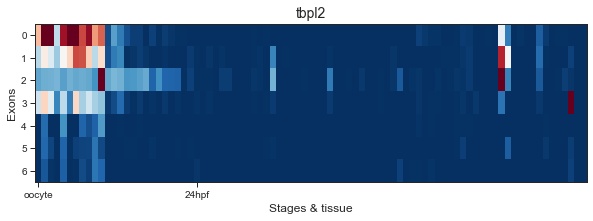

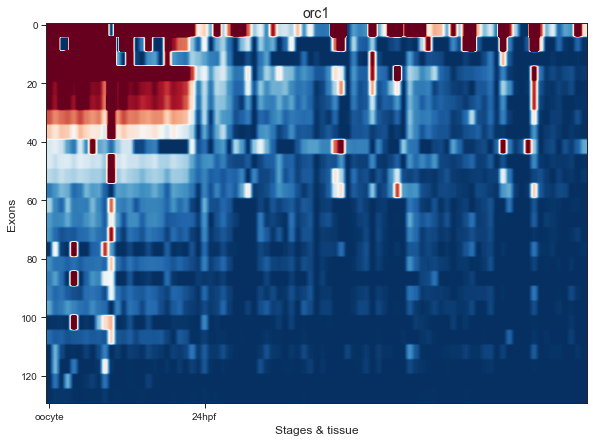

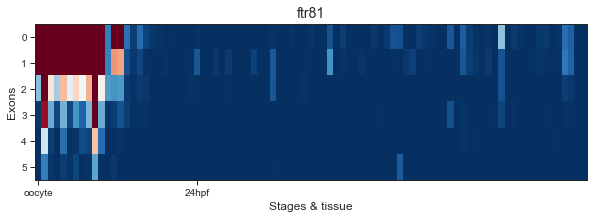

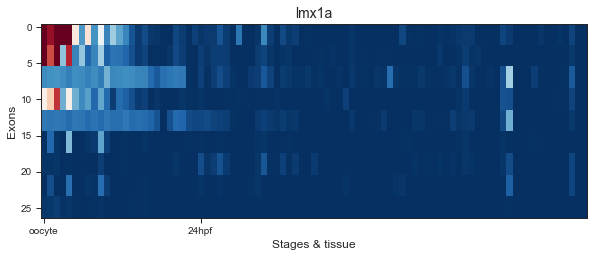

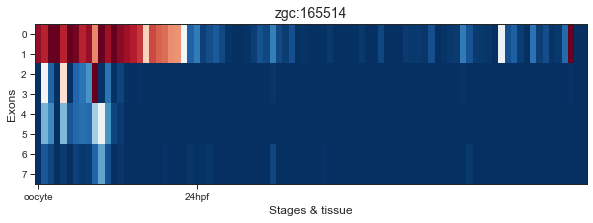

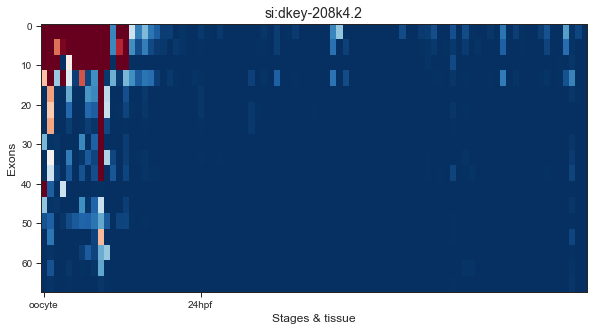

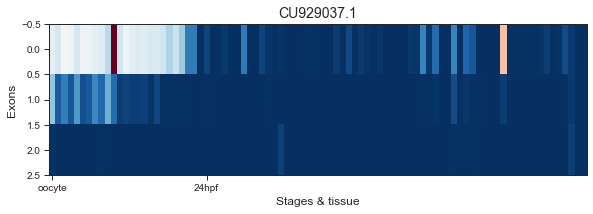

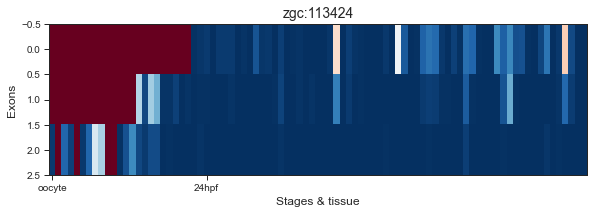

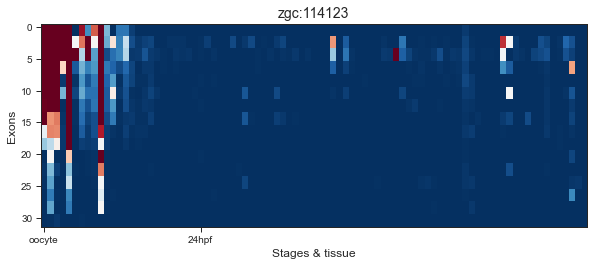

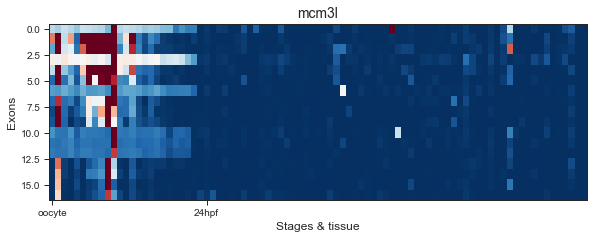

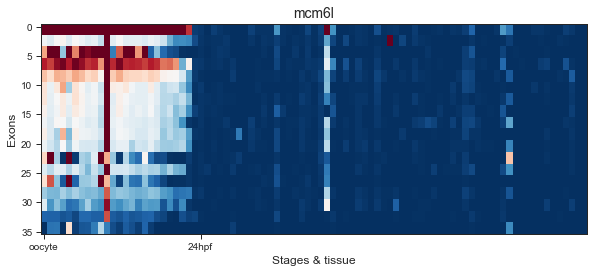

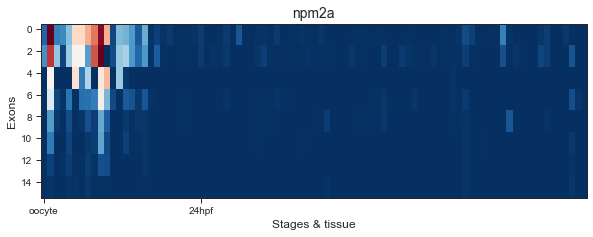

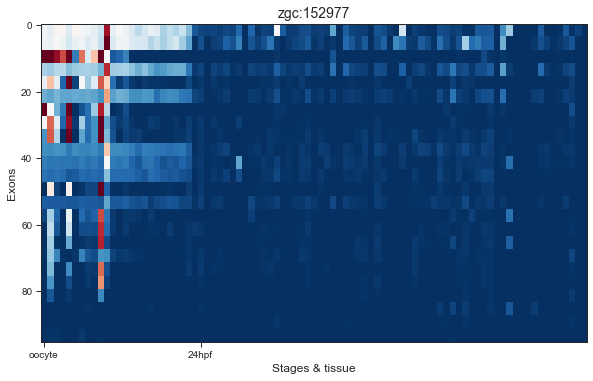

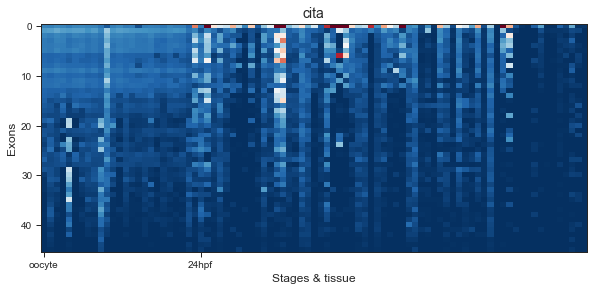

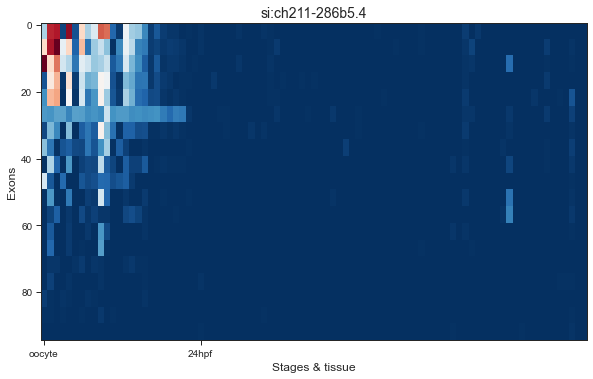

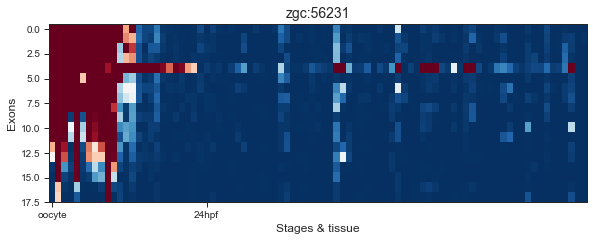

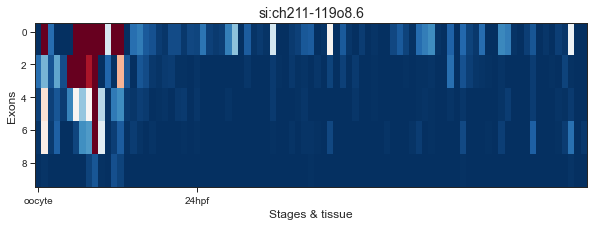

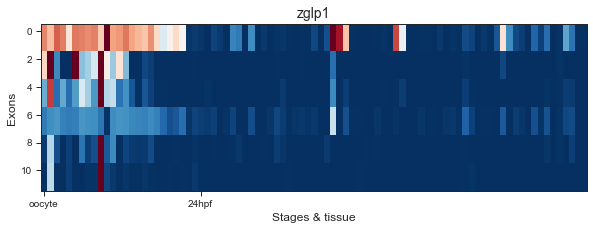

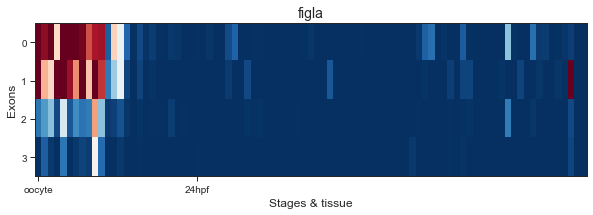

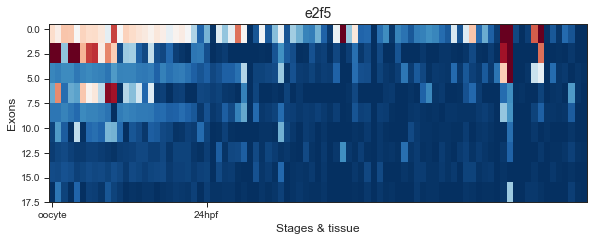

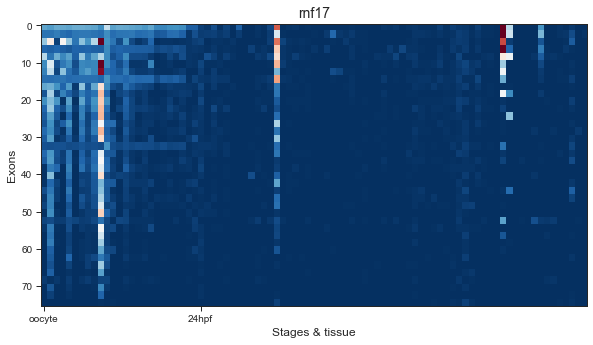

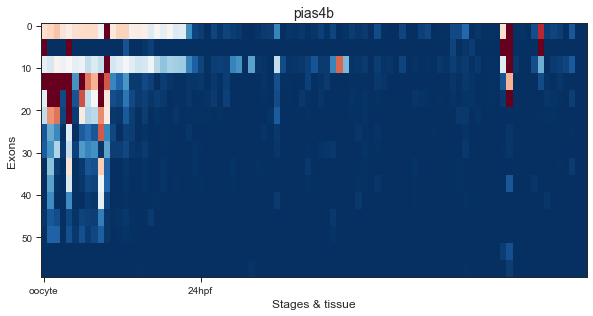

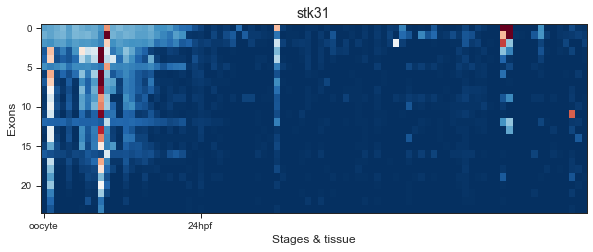

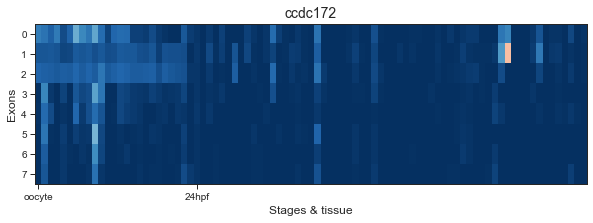

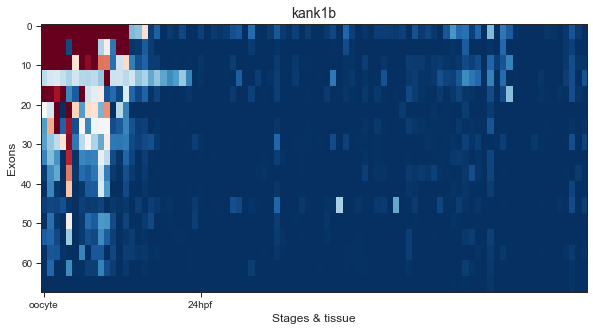

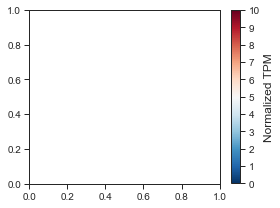

In [305]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    
    with PdfPages(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_heatmap_candidate_expr.pdf') as pdf_pages :
        for gene in candidate_maternal_gene_ls + ['bar'] :
            if gene != 'bar' :
                plot_df = candidate_expr_total_df.iloc[:, 1:-5].loc[candidate_expr_total_df['gene_symbol'] == gene]
                plot_df['rank'] = plot_df.mean(axis = 1)
                plot_df = plot_df.sort_values('rank', ascending = False).drop('rank', axis = 1)
                fig, ax = plt.subplots(figsize = (4+plot_df.shape[1]*.05, 3+plot_df.shape[0]*.025), tight_layout = True)
                pos = ax.imshow(plot_df,
                              aspect = 'auto',
                              vmax = 10,
                              vmin = 0,
                              cmap = 'RdBu_r'
                            )

    #             ax.set_yticks(range(1, plot_df.shape[0]+1, 5))
    #             ax.set_yticklabels()
                ax.set_ylabel('Exons')
    #             ax.set_xticks(range(plot_df.shape[1]))
                ax.set_xticks([0,25])
                ax.set_xticklabels(['oocyte', '24hpf'])
                ax.set_xlabel('Stages & tissue')
                ax.set_title(gene)
            else :
                fig, ax = plt.subplots(figsize = (4, 3), tight_layout = True)
                cbar = fig.colorbar(pos, ax=ax, extend='neither', ticks=[x for x in range(11)])
                cbar.set_label('Normalized TPM')
                cbar.ax.set_yticklabels([str(x) for x in range(11)])                 
        

            pdf_pages.savefig(fig)
    

### wi testis

In [306]:
candidate_expr_total_df = pd.concat([
    expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50_candidate'].iloc[:,:-5],
    expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exonOver50_candidate'].iloc[:,1:]
], axis = 1)

<ipython-input-333-ccf8e65eebf5>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (4+plot_df.shape[1]*.05, 3+plot_df.shape[0]*.025), tight_layout = True)


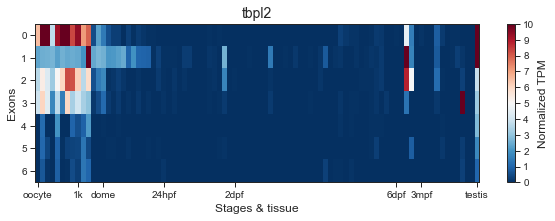

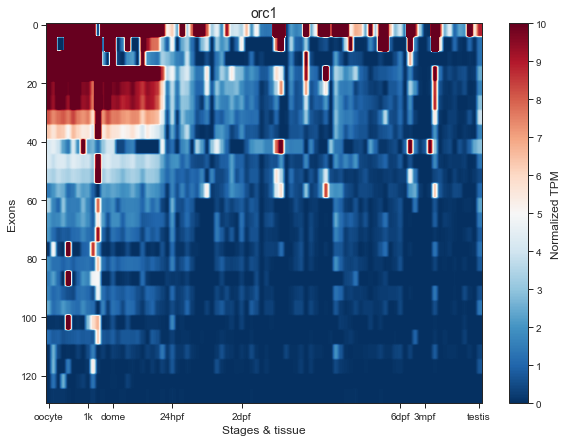

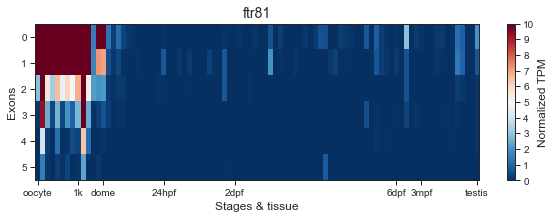

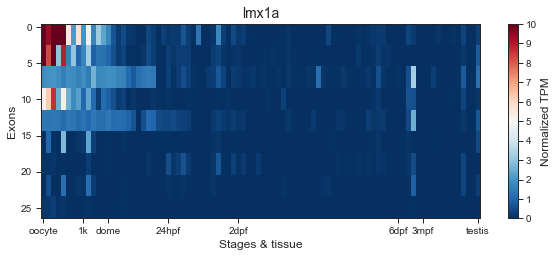

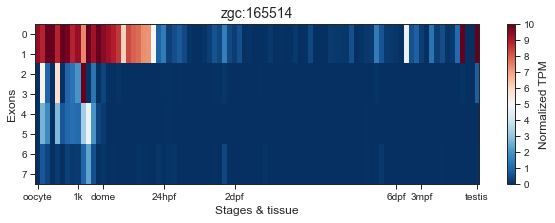

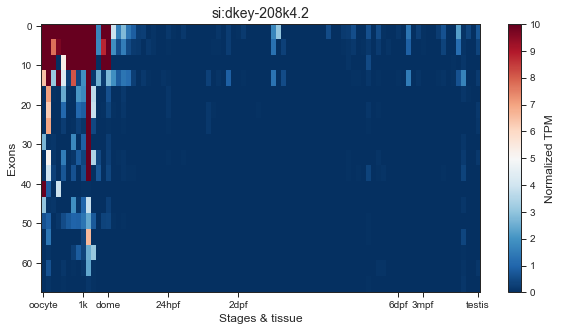

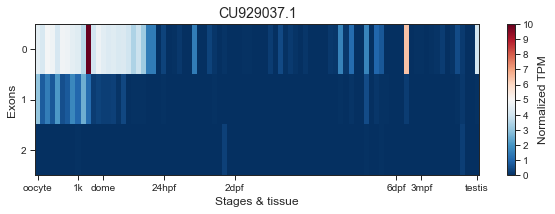

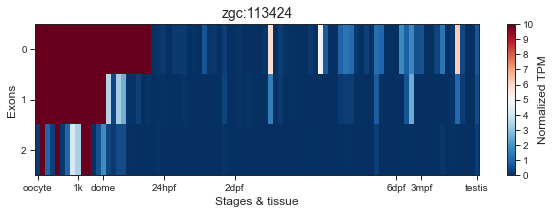

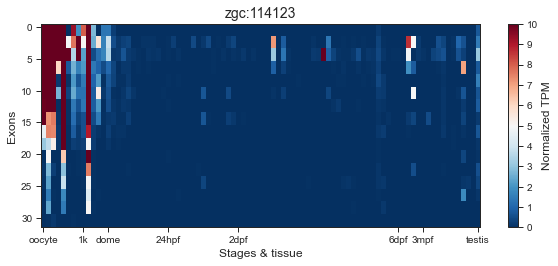

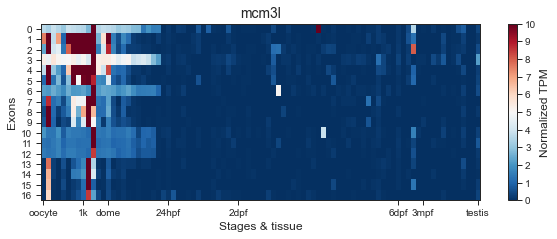

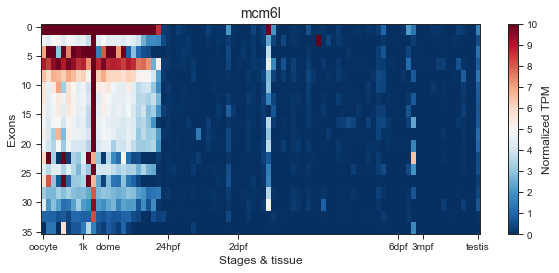

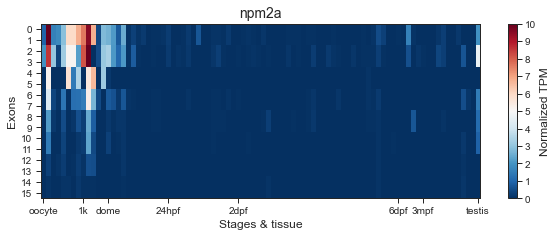

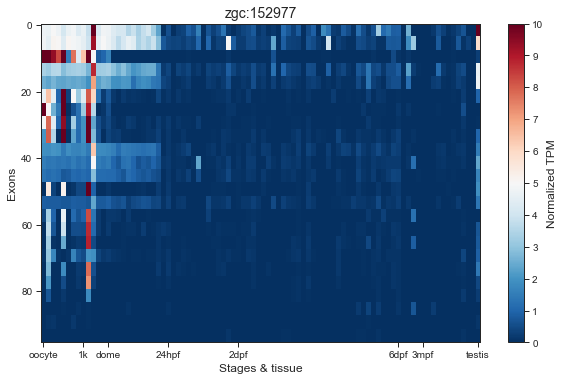

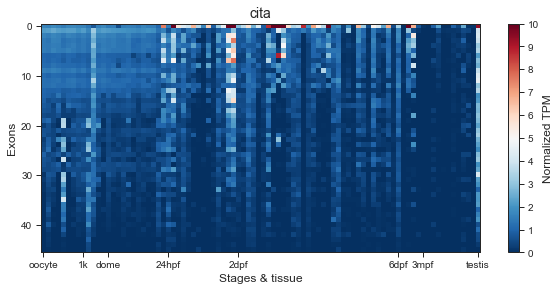

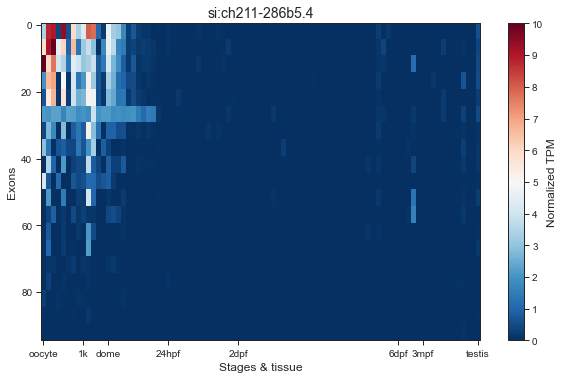

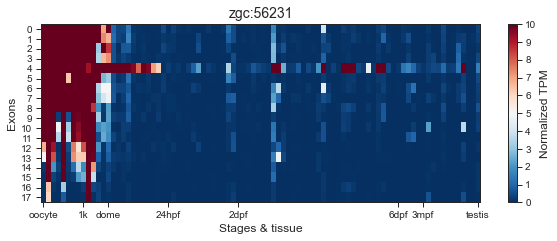

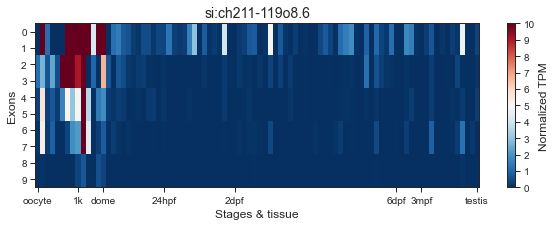

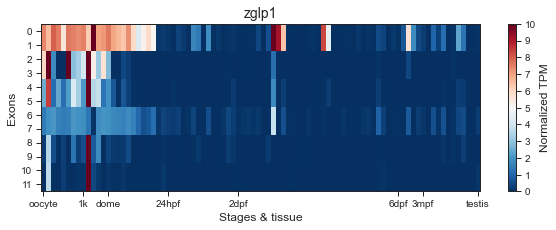

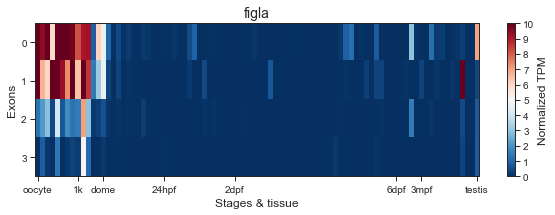

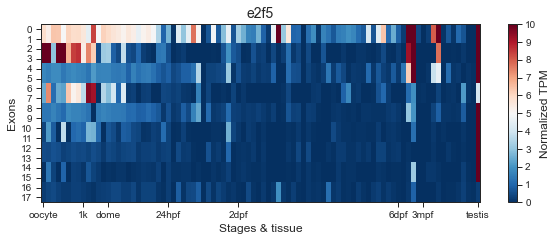

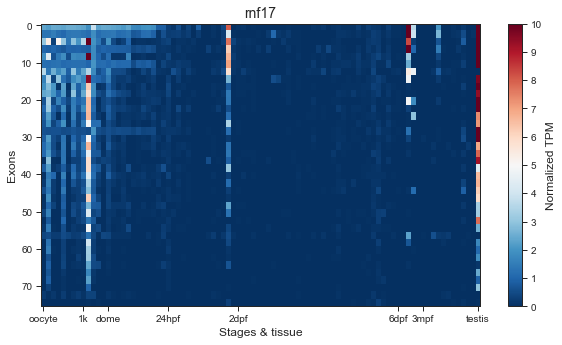

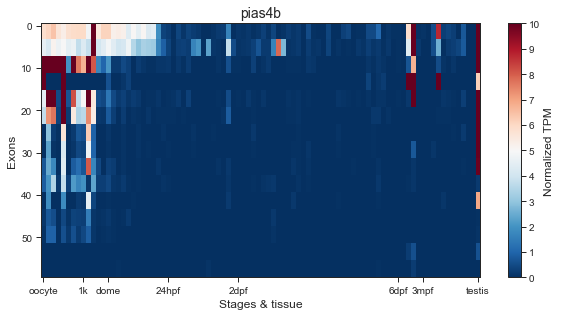

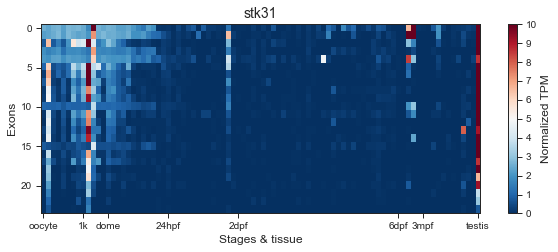

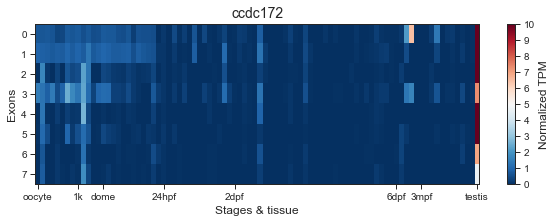

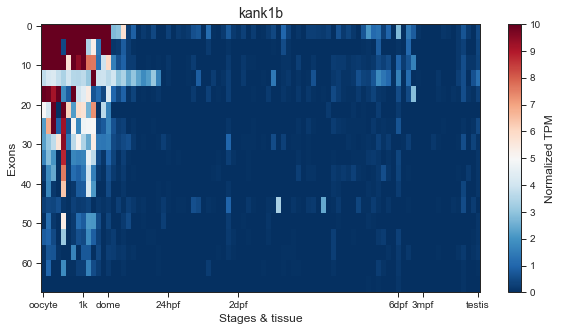

In [333]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    
    with PdfPages(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_heatmap_candidate_expr_wiTestis.pdf') as pdf_pages :
        for gene in candidate_maternal_gene_ls :
            plot_df = candidate_expr_total_df.iloc[:, 1:-5].loc[candidate_expr_total_df['gene_symbol'] == gene]
            plot_df['rank'] = plot_df.mean(axis = 1)
            plot_df = plot_df.sort_values('rank', ascending = False).drop('rank', axis = 1)
            fig, ax = plt.subplots(figsize = (4+plot_df.shape[1]*.05, 3+plot_df.shape[0]*.025), tight_layout = True)
            pos = ax.imshow(plot_df,
                          aspect = 'auto',
                          vmax = 10,
                          vmin = 0,
                          cmap = 'RdBu_r'
                        )
            if plot_df.shape[0] <= 20 :
                ax.set_yticks(range(0, plot_df.shape[0]))
#                 ax.set_yticklabels()
            ax.set_ylabel('Exons')
#             ax.set_xticks(range(plot_df.shape[1]))
            ax.set_xticks([0,8,13,25, 39,71,76,87])
            ax.set_xticklabels(['oocyte', '1k', 'dome', '24hpf', '2dpf', '6dpf', '3mpf', 'testis'])
            ax.set_xlabel('Stages & tissue')
            ax.set_title(gene)
            cbar = fig.colorbar(pos, ax=ax, extend='neither', ticks=[x for x in range(11)])
            cbar.set_label('Normalized TPM')
            cbar.ax.set_yticklabels([str(x) for x in range(11)])     

        

            pdf_pages.savefig(fig)
    

In [319]:
3.343 / 4

0.83575

In [ ]:
len(['oocyte'] * 2 + ['1_cell'] * 12 + ['2_cell'] * 5 + ['4_cell'] * 2 + ['24_cell'] * 2 + ['64_cell'] * 2 + ['128_cell'] * 5)

## filtering

In [357]:
10 ** 6 / 298888

3.3457348572040364

In [396]:
10 ** 6 / 298888 * 1.5

5.018602285806055

In [397]:
10 ** 6 / 298888 * 0.25

0.8364337143010091

In [392]:
tmp_df = pd.DataFrame(expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50'].max(axis = 1, numeric_only=True))
tmp_df = pd.merge(tmp_df.loc[tmp_df[0] < 0.84].reset_index(), exon_tr_gene_pd_clean.drop('transcript_id_clean', axis = 1), on = 'exon_id')
print(len(tmp_df['exon_id'].unique()), len(tmp_df['gene_id_clean'].unique()))

tmp_df2 = pd.DataFrame(expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50'].max(axis = 1, numeric_only=True))
tmp_df2 = pd.merge(tmp_df2.loc[tmp_df2[0] > 5.02].reset_index(), exon_tr_gene_pd_clean.drop('transcript_id_clean', axis = 1), on = 'exon_id')
print(len(tmp_df2['exon_id'].unique()), len(tmp_df2['gene_id_clean'].unique()))

filtered_exon_gene_clean = pd.merge(tmp_df, tmp_df2, on = 'exon_id').drop_duplicates().drop('gene_id_clean_y', axis = 1)
filtered_exon_gene_clean.columns = ['exon_id', 'lateEmbryoTissue_expr', 'gene_id_clean', 'earlyEmbryo_expr']
filtered_exon_gene_clean = pd.merge(filtered_exon_gene_clean, gene_symbol_clean, on = 'gene_id_clean').iloc[:, [0,2,4,3,1]]

79801 21146
59088 14085


In [393]:
filtered_exon_gene_clean

,exon_id,gene_id_clean,gene_symbol,earlyEmbryo_expr,lateEmbryoTissue_expr
0,ENSDART00000109083.5.1,ENSDARG00000058962,txnl4b,5.541650,0.698798
1,ENSDART00000092324.5.5_ENSDART00000179970.1.5,ENSDARG00000063297,abcb6a,5.377512,0.580540
2,ENSDART00000092324.5.13_ENSDART00000179970.1.13,ENSDARG00000063297,abcb6a,6.949168,0.533207
3,ENSDART00000054981.5.11,ENSDARG00000037739,zgc:112980,5.811837,0.374921
4,ENSDART00000054981.5.14,ENSDARG00000037739,zgc:112980,6.821558,0.578498
...,...,...,...,...,...
1169,ENSDART00000154125.3_5.2,ENSDARG00000103283,si:dkey-238o14.7,6.937231,0.115386
1170,ENSDART00000154125.3_5.3,ENSDARG00000103283,si:dkey-238o14.7,6.145462,0.120566
1171,ENSDART00000154125.3_5.6,ENSDARG00000103283,si:dkey-238o14.7,16.092961,0.401886
1172,ENSDART00000174362.2.3_ENSDART00000170520.3.2,ENSDARG00000102473,zgc:171673,6.075843,0.735149


In [394]:
len(filtered_exon_gene_clean['gene_symbol'].unique())

613

In [395]:
set(filtered_exon_gene_clean['gene_symbol'].unique()) & set(candidate_maternal_gene_ls)

{'figla',
 'ftr81',
 'kank1b',
 'lmx1a',
 'mcm3l',
 'mcm6l',
 'npm2a',
 'orc1',
 'pias4b',
 'rnf17',
 'si:ch211-119o8.6',
 'si:ch211-286b5.4',
 'si:dkey-208k4.2',
 'stk31',
 'zgc:113424',
 'zgc:114123',
 'zgc:152977',
 'zgc:165514',
 'zgc:56231',
 'zglp1'}

In [398]:
filtered_exon_gene_clean.loc[filtered_exon_gene_clean['gene_symbol'] == 'orc1']

,exon_id,gene_id_clean,gene_symbol,earlyEmbryo_expr,lateEmbryoTissue_expr
942,ENSDART00000191909.1.7_ENSDART00000151213.3.8_...,ENSDARG00000039217,orc1,5.351594,0.711645


In [382]:
filtered_exon_gene_clean.loc[filtered_exon_gene_clean['gene_symbol'] == 'cita']

,exon_id,gene_id_clean,gene_symbol,earlyEmbryo_expr,lateEmbryoTissue_expr
1492,ENSDART00000122274.3.13,ENSDARG00000089856,cita,4.137925,0.657828


In [377]:
set(candidate_maternal_gene_ls) - set(filtered_exon_gene_clean['gene_symbol'].unique())

{'CU929037.1', 'ccdc172', 'cita', 'e2f5', 'tbpl2'}

In [239]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50'].mean(axis = 0, numeric_only=True).median()

3.3430756041825718

In [240]:
expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50'].mean(axis = 0, numeric_only=True).median()

3.3433734449094663

The real mean TPM is not equal to the theoretical TPM because the TPM is averaged by reps firstly.

### box expr distibution

In [426]:
for gene in ['nanog'] :
    print(filtered_exon_gene_clean.loc[filtered_exon_gene_clean['gene_symbol'] == gene])

                    exon_id       gene_id_clean gene_symbol  earlyEmbryo_expr  \
745  ENSDART00000114762.3.3  ENSDARG00000075113       nanog         90.257629   

     lateEmbryoTissue_expr  
745               0.496643  


In [399]:
for gene in ['npm2a', 'orc1', 'mcm3l', 'mcm6l'] :
    print(filtered_exon_gene_clean.loc[filtered_exon_gene_clean['gene_symbol'] == gene])

                                            exon_id       gene_id_clean  \
1016  ENSDART00000108556.5.4_ENSDART00000147942.2.3  ENSDARG00000076391   
1017                         ENSDART00000108556.5.6  ENSDARG00000076391   
1018                         ENSDART00000147942.2.5  ENSDARG00000076391   

     gene_symbol  earlyEmbryo_expr  lateEmbryoTissue_expr  
1016       npm2a          5.289578               0.585764  
1017       npm2a          6.627841               0.114372  
1018       npm2a         14.089410               0.691843  
                                               exon_id       gene_id_clean  \
942  ENSDART00000191909.1.7_ENSDART00000151213.3.8_...  ENSDARG00000039217   

    gene_symbol  earlyEmbryo_expr  lateEmbryoTissue_expr  
942        orc1          5.351594               0.711645  
                     exon_id       gene_id_clean gene_symbol  \
518   ENSDART00000054653.5.3  ENSDARG00000037532       mcm3l   
519   ENSDART00000054653.5.4  ENSDARG00000037532       m

#### combat

In [415]:
expr_mcm3l = pd.DataFrame([expr_combat_dict['ovary_earlyEmbryo_TPM'].compute().loc['ENSDART00000054653.5.14'].tolist(), 
                          expr_combat_dict['ovary_earlyEmbryo_TPM'].columns.tolist(), 
                          ovary_earlyEmbryo_TPM_stages[6:]]).T
expr_mcm3l

,0,1,2
0,0.0,oocyte_rep1,oocyte
1,0.923427,oocyte_rep2,oocyte
2,34.621689,1cell_rep1,1_cell
3,39.041281,1cell_rep2,1_cell
4,31.532153,1cell_rep3,1_cell
...,...,...,...
105,0.0,elife_30860_19hpf_somites_3,19hpf
106,0.0,elife_30860_19hpf_somites_4,19hpf
107,0.0,elife_30860_19hpf_somites_5,19hpf
108,0.136545,20ss_allskin_rep1,20ss


In [418]:
expr_mcm3l.head(20)

,0,1,2
0,0.0,oocyte_rep1,oocyte
1,0.923427,oocyte_rep2,oocyte
2,34.621689,1cell_rep1,1_cell
3,39.041281,1cell_rep2,1_cell
4,31.532153,1cell_rep3,1_cell
5,25.32334,1cell_rep4,1_cell
6,20.871451,1cell_rep5,1_cell
7,0.851797,1cell_rep6,1_cell
8,0.646082,1cell_rep7,1_cell
9,0.573441,elife_30860_1cell_1,1_cell


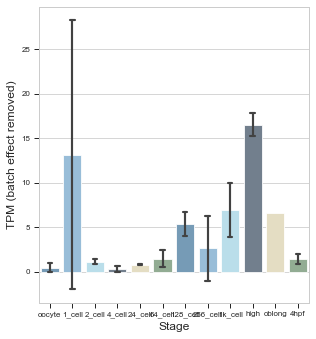

In [417]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 8,
                             'ytick.labelsize': 8,
                             'legend.fontsize': 8
                         }):
    fig, ax = plt.subplots(figsize=(6.4 * .7, 4.8))
    plot_df = expr_mcm3l.iloc[:50, :]
    plot_df.columns = ['TPM (batch effect removed)', 'Replicate', 'Stage']
    sns.barplot(
        x='Stage',
        y='TPM (batch effect removed)',
        data=plot_df,
        palette=['#769BB6', '#98BDD8', '#BADEEA', '#727F8D', '#E4DDC3', '#92AC93',],
        ci='sd',
        saturation=1,
        capsize=.2,
        ax=ax,
    )
#     ax.set_xticklabels(labels=plot_df.sort_values('Stage')['Gene symbol'].unique(),
#                        rotation=45, ha = 'right')
#     ax.set_ylabel('Relative expression')
#     ax.set_xlabel('Mutated genes')
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_barplot_mcm3l_expr_combat.pdf', transparent=True)


#### raw

In [463]:
expr_mcm3l_raw = pd.DataFrame([expr_raw_dict['ovary_earlyEmbryo_TPM'].compute().loc['ENSDART00000054653.5.14'].tolist(), 
                           expr_raw_dict['ovary_earlyEmbryo_TPM'].columns.tolist(), 
                           ovary_earlyEmbryo_TPM_stages[6:]]).T
expr_mcm3l_raw

,0,1,2
0,0.344569,5mpf_ovary_rep1,oocyte
1,74.247902,ovary_rep2,oocyte
2,0.0,oocyte_rep1,1_cell
3,2.04587,oocyte_rep2,1_cell
4,31.769945,oocyte_stage1,1_cell
...,...,...,...
111,0.0,elife_30860_19hpf_somites_3,None
112,0.0,elife_30860_19hpf_somites_4,None
113,0.0,elife_30860_19hpf_somites_5,None
114,0.141787,20ss_allskin_rep1,None


In [464]:
expr_mcm3l_raw.head(20)

,0,1,2
0,0.344569,5mpf_ovary_rep1,oocyte
1,74.247902,ovary_rep2,oocyte
2,0.0,oocyte_rep1,1_cell
3,2.04587,oocyte_rep2,1_cell
4,31.769945,oocyte_stage1,1_cell
5,31.870901,oocyte_stage2,1_cell
6,33.452408,oocyte_stage3,1_cell
7,2.518099,oocyte_stage4,1_cell
8,52.863899,1cell_rep1,1_cell
9,59.803696,1cell_rep2,1_cell


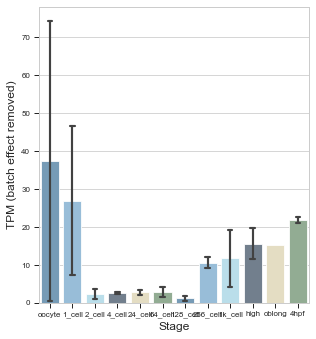

In [465]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 8,
                             'ytick.labelsize': 8,
                             'legend.fontsize': 8
                         }):
    fig, ax = plt.subplots(figsize=(6.4 * .7, 4.8))
    plot_df = expr_mcm3l_raw.iloc[:50, :]
    plot_df.columns = ['TPM (batch effect removed)', 'Replicate', 'Stage']
    sns.barplot(
        x='Stage',
        y='TPM (batch effect removed)',
        data=plot_df,
        palette=['#769BB6', '#98BDD8', '#BADEEA', '#727F8D', '#E4DDC3', '#92AC93',],
        ci='sd',
        n_boot = 0,
        saturation=1,
        capsize=.2,
        ax=ax,
    )
#     ax.set_xticklabels(labels=plot_df.sort_values('Stage')['Gene symbol'].unique(),
#                        rotation=45, ha = 'right')
#     ax.set_ylabel('Relative expression')
#     ax.set_xlabel('Mutated genes')
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_barplot_mcm3l_expr_raw.pdf', transparent=True)


#### nanog

'ENSDART00000114762.3.3'

In [477]:
expr_nanog = pd.DataFrame([expr_combat_dict['ovary_earlyEmbryo_TPM'].compute().loc['ENSDART00000114762.3.4'].tolist(), 
                          expr_combat_dict['ovary_earlyEmbryo_TPM'].columns.tolist(), 
                          ovary_earlyEmbryo_TPM_stages[6:]]).T
expr_nanog

,0,1,2
0,214.850919,oocyte_rep1,oocyte
1,253.019068,oocyte_rep2,oocyte
2,157.733682,1cell_rep1,1_cell
3,160.491321,1cell_rep2,1_cell
4,127.999162,1cell_rep3,1_cell
...,...,...,...
105,133.160374,elife_30860_19hpf_somites_3,19hpf
106,265.913025,elife_30860_19hpf_somites_4,19hpf
107,175.757446,elife_30860_19hpf_somites_5,19hpf
108,142.689076,20ss_allskin_rep1,20ss


In [486]:
expr_nanog.head(60)

,0,1,2
0,214.850919,oocyte_rep1,oocyte
1,253.019068,oocyte_rep2,oocyte
2,157.733682,1cell_rep1,1_cell
3,160.491321,1cell_rep2,1_cell
4,127.999162,1cell_rep3,1_cell
5,130.249144,1cell_rep4,1_cell
6,135.285935,1cell_rep5,1_cell
7,241.910318,1cell_rep6,1_cell
8,242.080173,1cell_rep7,1_cell
9,305.643802,elife_30860_1cell_1,1_cell


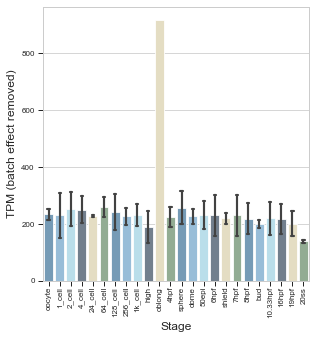

In [479]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 8,
                             'ytick.labelsize': 8,
                             'legend.fontsize': 8
                         }):
    fig, ax = plt.subplots(figsize=(6.4 * .7, 4.8))
    plot_df = expr_nanog.iloc[:110, :]
    plot_df.columns = ['TPM (batch effect removed)', 'Replicate', 'Stage']
    sns.barplot(
        x='Stage',
        y='TPM (batch effect removed)',
        data=plot_df,
        palette=['#769BB6', '#98BDD8', '#BADEEA', '#727F8D', '#E4DDC3', '#92AC93',],
        ci='sd',
        saturation=1,
        capsize=.2,
        ax=ax,
    )
    ax.set_xticklabels(labels=plot_df['Stage'].unique(),
                       rotation=90, va = 'center_baseline')
#     ax.set_ylabel('Relative expression')
#     ax.set_xlabel('Mutated genes')
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_barplot_nanog_expr_combat.pdf', transparent=True)


In [487]:
expr_nanog_raw = pd.DataFrame([expr_raw_dict['ovary_earlyEmbryo_TPM'].compute().loc['ENSDART00000114762.3.4'].tolist()[2,3,8:], 
                           expr_raw_dict['ovary_earlyEmbryo_TPM'].columns.tolist()[6:], 
                           ovary_earlyEmbryo_TPM_stages[6:]]).T
expr_nanog_raw

TypeError: list indices must be integers or slices, not tuple

In [481]:
expr_nanog_raw.head(50)

,0,1,2
0,27.20871,oocyte_stage3,oocyte
1,79.617218,oocyte_stage4,oocyte
2,60.918198,1cell_rep1,1_cell
3,63.236721,1cell_rep2,1_cell
4,32.426426,1cell_rep3,1_cell
5,35.877087,1cell_rep4,1_cell
6,38.080353,1cell_rep5,1_cell
7,301.607697,1cell_rep6,1_cell
8,293.24292,1cell_rep7,1_cell
9,362.831268,elife_30860_1cell_1,1_cell


In [484]:
132630 / 1809 / 157.82 * (10 ** 9)

464559305.4454841

In [482]:
expr_combat_dict['ovary_earlyEmbryo_TPM'].loc[expr_combat_dict['ovary_earlyEmbryo_TPM']['oblong_rep1'].astype(float) == 234.143509].compute()

,oocyte_rep1,oocyte_rep2,1cell_rep1,1cell_rep2,1cell_rep3,1cell_rep4,1cell_rep5,1cell_rep6,1cell_rep7,elife_30860_1cell_1,...,elife_30860_16hpf_somites_3,elife_30860_16hpf_somites_4,elife_30860_16hpf_somites_5,elife_30860_19hpf_somites_1,elife_30860_19hpf_somites_2,elife_30860_19hpf_somites_3,elife_30860_19hpf_somites_4,elife_30860_19hpf_somites_5,20ss_allskin_rep1,20ss_allskin_rep2
exon_id,,,,,,,,,,,,,,,,,,,,,


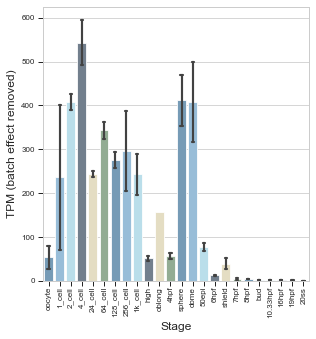

In [483]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 8,
                             'ytick.labelsize': 8,
                             'legend.fontsize': 8
                         }):
    fig, ax = plt.subplots(figsize=(6.4 * .7, 4.8))
    plot_df = expr_nanog_raw.iloc[:110, :]
    plot_df.columns = ['TPM (batch effect removed)', 'Replicate', 'Stage']
    sns.barplot(
        x='Stage',
        y='TPM (batch effect removed)',
        data=plot_df,
        palette=['#769BB6', '#98BDD8', '#BADEEA', '#727F8D', '#E4DDC3', '#92AC93',],
        ci='sd',
        saturation=1,
        capsize=.2,
        ax=ax,
    )
    ax.set_xticklabels(labels=plot_df['Stage'].unique(),
                       rotation=90, va = 'center_baseline')
#     ax.set_ylabel('Relative expression')
#     ax.set_xlabel('Mutated genes')
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_barplot_nanog_expr_combat_raw.pdf', transparent=True)
